# **Stochastic Process and Option Pricing**
## Outlines
> [Brownian Motion](#1-browian-motion)

> [Bachelier Model](#2bachelier)

> [Black-Scholes Model](#3black-scholes)

> [Black 76 Model](#4black-76-model)

> [DD Model](#5displaced-diffudion-model)

> [Static Replication](#6static-replication)

In [1]:
# import packages
import numpy as np
import matplotlib.pylab as plt
import random
from scipy.stats import norm
from scipy.integrate import quad


In [2]:
# set random seed
def set_random_seed(seed):
    random.seed(seed)
    np.random.seed(seed)

set_random_seed(100)

## 1. **`Browian Motion`**

> Defination of Browian Motion
$$
W_{t+\Delta t} - W_t \sim N(0, \Delta t) \sim \sqrt{\Delta t} N(0, 1)
$$

> Simulation

In [3]:
def simulate_Brownian_Motion(paths, steps, T):
    deltaT = T/steps
    t = np.linspace(0, T, steps+1)
    X = np.c_[np.zeros((paths, 1)),
              np.random.randn(paths, steps)]
    return t, np.cumsum(np.sqrt(deltaT) * X, axis=1)

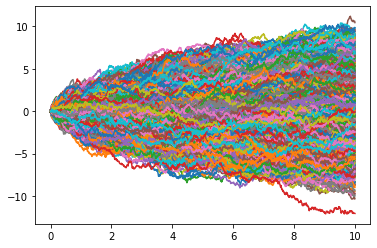

In [4]:
plt.figure()
t, x = simulate_Brownian_Motion(5000, 1000, 10.0)
plt.plot(t, x.T)
plt.show()

> Test the distribution of Brownian Motion
$$W_t \sim N(0, t)$$

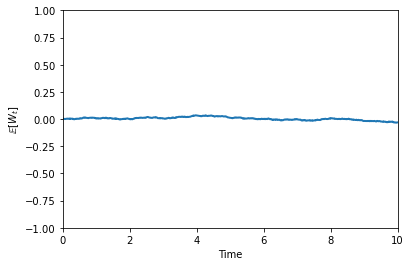

In [5]:
# mean
plt.figure()
plt.plot(t, 
        np.mean(x, axis=0),
        linewidth=2
        )

plt.axis([0, 10, -1, 1])
plt.xlabel('Time')
plt.ylabel(r'$\mathbb{E}[W_t]$')
plt.show()

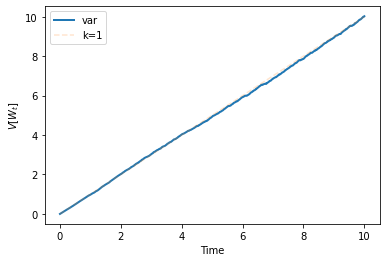

In [6]:
# std
plt.figure()

plt.plot(t, 
        np.var(x, axis=0),
        linewidth=2,
        label='var'
        )

plt.plot(t,
        t,
        '--',
        label='k=1',
        alpha=0.2
        )

plt.xlabel('Time')
plt.ylabel(r'$V[W_t]$')
plt.legend()
plt.show()

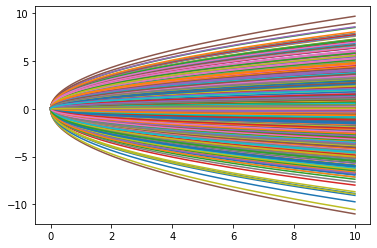

In [7]:
Zs = np.random.randn(1000)
plt.figure()
for Z in Zs:
    X_t = np.sqrt(t)*Z
    plt.plot(t, X_t)
    
plt.show()

## 2.**`Bachelier`**

> Bachelier fomula
$$
S_{t+\Delta t} = S_t + \sigma \cdot (W_{t+\Delta t} - W_t)
$$

In [8]:
# Vanilla Call
def BachelierVanillaCall(S,K,r,sigma,T):
    x = (S-K)/(sigma*np.sqrt(T))
    return np.exp(-r*T)*((S-K)*norm.cdf(x) + sigma*np.sqrt(T)*norm.pdf(x))

In [12]:
S = 100.0
r = 0.05
T = 2.0
K = S * np.exp(r*T)
F = np.exp(r * T) * S
sigma = 0.4

print('Vanilla Call price: %.4f' % BachelierVanillaCall(S, K, r, sigma, T))

Vanilla Call price: 0.0000


In [14]:
# Vanilla Put
def BachelierVanillaPut(S,K,r,sigma,T):
    x = (K-S)/(sigma*np.sqrt(T))
    return np.exp(-r*T)*((K-S)*norm.cdf(x) + sigma*np.sqrt(T)*norm.pdf(x))

In [15]:
print('Vanilla Put price: %.4f' % BachelierVanillaPut(S, K, r, sigma, T))

Vanilla Put price: 9.5163


In [16]:
# Cash-or-nothing Call
def BachelierCashCall(S, K, r, sigma, T):
    x = (S - K) / (sigma*np.sqrt(T))
    return np.exp(-r*T)*norm.cdf(x)

In [17]:
print('Cash-or-nothing Call price: %.4f' % BachelierCashCall(S, K, r, sigma, T))

Cash-or-nothing Call price: 0.0000


In [18]:
## Cash-or-nothing Put
def BachelierCashPut(S, K, r, sigma, T):
    x = (K - S) / (sigma*np.sqrt(T))
    return np.exp(-r*T)*norm.cdf(x)

In [19]:
print('Cash-or-nothing Put price: %.4f' % BachelierCashPut(S, K, r, sigma, T))

Cash-or-nothing Put price: 0.9048


In [20]:
# Asset-or-nothing Call
def BachelierAssetCall(S, K, r, sigma, T):
    x = (S-K) / (sigma*np.sqrt(T))
    return np.exp(-r*T)*(S*norm.cdf(x) +(sigma*np.sqrt(T))*norm.pdf(x))

In [21]:
print('Asset-or-nothing Call price: %.4f' % BachelierAssetCall(S, K, r, sigma, T))

Asset-or-nothing Call price: 0.0000


In [22]:
# Asset-or-nothing Put
def BachelierAssetPut(S, K, r, sigma, T):
    x = (K - S) / (sigma*np.sqrt(T))
    return np.exp(-r*T)*(S*norm.cdf(x) - (sigma*np.sqrt(T))*norm.pdf(x))

In [23]:
print('Asset-or-nothing Put price: %.4f' % BachelierAssetPut(S, K, r, sigma, T))

Asset-or-nothing Put price: 90.4837


## 3.**`Black-Scholes`**

> Black-Scholes fomula

$$
S_{t+\Delta t} = S_t \exp\left[\left(r - \frac{\sigma^2}{2}\right) \Delta t + \sigma \cdot (W_{t+\Delta t} - W_t)\right] 
$$

> Black-Scholes <font color = "red"> **call** </font> option

\begin{equation}
\begin{split}
C(S,K,r,\sigma,T) &= S_0 \Phi(d_1) - K e^{-rT} \Phi(d_2)\\
            d_1 &= \frac{\log \frac{S_0}{K} +
            \left(r+\frac{\sigma^2}{2}\right)T}{\sigma\sqrt{T}}, \hspace{0.5cm} d_2 = d_1 - \sigma\sqrt{T} \nonumber\\ 
\end{split}
\end{equation}

In [ ]:
def BlackScholesCall(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)

> Black-Scholes <font color = "red"> **put** </font> option

\begin{equation}
P(S,K,r,\sigma,T) = K e^{-rT} \Phi(-d_2) - S_0 \Phi(-d_1) \nonumber
\end{equation}

In [ ]:
def BlackScholesPut(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return K*np.exp(-r*T)*norm.cdf(-d2) - S*norm.cdf(-d1)

> <font color = "red"> **put-call parity** </font>

\begin{equation}
C(S, K, r, \sigma, T) - P(S, K, r, \sigma, T) = S - Ke^{-rT} \nonumber
\end{equation}

If $K=Se^{rT}$, call and put option should worth the same.

> Example 1:

In [ ]:
# initial parameters
S = 100.0
r = 0.05
T = 2.0
sigma = 0.4

# set strike price = K
K = S * np.exp(r*T)

In [ ]:
print('Stike price: %.5f' %K)
print('Call price: %.5f' % BlackScholesCall(S, K, r, sigma, T))
print('Put price: %.5f' % BlackScholesPut(S, K, r, sigma, T))

Stike price: 110.51709
Call price: 22.27026
Put price: 22.27026


> Example 2:
- set $\Delta K = 5.0$  
- call option struck at $K+\Delta K$    
- put option struck at $K-\Delta K$

In [ ]:
# dK
dK = 5.0
print('Call strike price %.5f' %(K+dK))
print('Put strike price %.5f' %(K-dK))

# set strike price = K + dK
print('Call price (K+dK): %.5f' % BlackScholesCall(S, K+dK, r, sigma, T))
print('Put price (K-dK): %.5f' % BlackScholesPut(S, K-dK, r, sigma, T))

Call strike price 115.51709
Put strike price 105.51709
Call price (K+dK): 20.57972
Put price (K-dK): 19.57531


In [ ]:
S = 100.0
r = 0.05
T = 2.0
K = S * np.exp(r*T)
F = np.exp(r * T) * S
sigma = 0.4

### Black-Scholes

\begin{equation}
P(S,K,r,\sigma,T) = K e^{-rT} \Phi(-d_2) - S_0 \Phi(-d_1)
\end{equation}

In [ ]:
# Vanilla Call BlackScholes
def BlackScholesVanillaCall(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)

print('Vanilla Call price: %.4f' % BlackScholesVanillaCall(S, K, r, sigma, T))

# Vanilla Put BlackScholes
def BlackScholesVanillaPut(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return K*np.exp(-r*T)*norm.cdf(-d2) - S*norm.cdf(-d1)

print('Vanilla Put price: %.4f' % BlackScholesVanillaPut(S, K, r, sigma, T))

Vanilla Call price: 13.8199
Vanilla Put price: 18.9470


In [ ]:
# Cash-or-nothing Call
def BlackScholesCashCall(S, K, r, sigma, T):
    x = (np.log(S/K)+(r-sigma**2/2)*T) / (sigma*np.sqrt(T))
    return np.exp(-r*T)*norm.cdf(x)

print('Cash-or-nothing Call price: %.4f' % BlackScholesCashCall(S, K, r, sigma, T))

## Cash-or-nothing Put
def BlackScholesCashPut(S, K, r, sigma, T):
    x = (np.log(K/S)-(r-sigma**2/2)*T) / (sigma*np.sqrt(T))
    return np.exp(-r*T)*norm.cdf(x)

print('Cash-or-nothing Put price: %.4f' % BlackScholesCashPut(S, K, r, sigma, T))

Cash-or-nothing Call price: 0.3517
Cash-or-nothing Put price: 0.5532


In [ ]:
# Asset-or-nothing Call
def BlackScholesAssetCall(S, K, r, sigma, T):
    x = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    return S*norm.cdf(x)

print('Asset-or-nothing Call price: %.4f' % BlackScholesAssetCall(S, K, r, sigma, T))

# Asset-or-nothing Put
def BlackScholesAssetPut(S, K, r, sigma, T):
    x = (np.log(K/S)-(r+(sigma**2)/2)*T) / (sigma*np.sqrt(T))
    return S*norm.cdf(x)

print('Asset-or-nothing Put price: %.4f' % BlackScholesAssetPut(S, K, r, sigma, T))

Asset-or-nothing Call price: 61.1351
Asset-or-nothing Put price: 38.8649


## 4.**`Black 76 Model`**

In [24]:
# Vanilla Call 
def Black76VanillaCall(F, K, r, sigma, T):
    d1 = (np.log(F/K)+(sigma**2)*T/2) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return np.exp(-r*T)*(F*norm.cdf(d1) - K*norm.cdf(d2))

In [25]:
# Vanilla Put
def Black76VanillaPut(F, K, r, sigma, T):
    d1 = (np.log(K/F)+(sigma**2)*T/2) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return np.exp(-r*T)*(K*norm.cdf(d1) - F*norm.cdf(d2))

In [26]:
# Cash or nothing Call 
def Black76CashCall(F, K, r, sigma, T):
    x = (np.log(F/K)-(sigma**2)*T/2) / (sigma*np.sqrt(T))
    return np.exp(-r*T)*norm.cdf(x)

In [27]:
# Cash or nothing Put
def Black76CashPut(F, K, r, sigma, T):
    x = (np.log(K/F)+(sigma**2)*T/2) / (sigma*np.sqrt(T))
    return np.exp(-r*T)*norm.cdf(x)

In [28]:
# Asset or nothing Call 
def Black76AssetCall(F, K, r, sigma, T):
    x = (np.log(F/K)+(sigma**2)*T/2) / (sigma*np.sqrt(T))
    return np.exp(-r*T)*F*norm.cdf(x)

In [29]:
# Asset or nothing Put
def Black76AssetPut(F, K, r, sigma, T):
    x = (np.log(K/F)-(sigma**2)*T/2) / (sigma*np.sqrt(T))
    return np.exp(-r*T)*F*norm.cdf(x)

## 5.**`Displaced-diffudion model`**

In [30]:
# Vanilla Call 
def DDVanillaCall(F, K, r, beta, sigma, T):
    d1 = (np.log(F/(beta*K +(1-beta)*F))+(beta**2)*(sigma**2)*T/2) / (beta*sigma*np.sqrt(T))
    d2 = d1 - beta*sigma*np.sqrt(T)
    return np.exp(-r*T)*(F/beta*norm.cdf(d1) -(((1-beta)/beta)*F +K)*norm.cdf(d2))

In [31]:
# Vanilla Put
def DDVanillaPut(F, K, r, beta, sigma, T):
    d1 = (np.log((beta*K +(1-beta)*F)/F)+(beta**2)*(sigma**2)*T/2) / (beta*sigma*np.sqrt(T))
    d2 = d1 - beta*sigma*np.sqrt(T)
    return np.exp(-r*T)*((((1-beta)/beta)*F+K)*norm.cdf(d1) - F/beta*norm.cdf(d2))

In [32]:
# Cash or nothing Call 
def DDCashCall(F, K, r, beta, sigma, T):
    x = (np.log(F/(beta*K +(1-beta)*F))-(beta**2)*(sigma**2)*T/2) / (beta*sigma*np.sqrt(T))
    return np.exp(-r*T)*norm.cdf(x)

In [33]:
# Cash or nothing Put
def DDCashPutl(F, K, r, beta, sigma, T):
    x = (np.log((beta*K +(1-beta)*F)/F)+(beta**2)*(sigma**2)*T/2) / (beta*sigma*np.sqrt(T))
    return np.exp(-r*T)*norm.cdf(x)

In [34]:
# Asset or nothing Call 
def DDAssetCall(F, K, r, beta, sigma, T):
    d1 = (np.log(F/(beta*K +(1-beta)*F))+(beta**2)*(sigma**2)*T/2) / (beta*sigma*np.sqrt(T))
    d2 = d1 - beta*sigma*np.sqrt(T)
    return np.exp(-r*T)*(F/beta*norm.cdf(d1) -(((1-beta)/beta)*beta*F)*norm.cdf(d2))

In [35]:
# Asset or nothing Put
def DDAssetPut(F, K, r, beta, sigma, T):
    d1 = (np.log((beta*K +(1-beta)*F)/F)+(beta**2)*(sigma**2)*T/2) / (beta*sigma*np.sqrt(T))
    d2 = d1 - beta*sigma*np.sqrt(T)
    return np.exp(-r*T)*(F/beta*norm.cdf(d2)-(((1-beta)/beta)*F)*norm.cdf(d1))

## 6.**`Static Replication`**

#### Carr-Madan static replication

\begin{equation*}
    \begin{split}
      V_0 = e^{-rT}h(F) + \underbrace{\int_0^{F}h''(K)P(K)\;dK}_{{put integral}} + \underbrace{\int_{F}^{\infty}h''(K)C(K)\;dK}_{{call integral}}\\
    \end{split}
\end{equation*}

> example

\begin{equation*}
\begin{split}
    \mathbb{E}\left[\int_0^T\sigma_t^2 \;dt\right] = 2e^{rT} \left(\int_0^{F}\frac{P(K)}{K^2}\;dK + \int_{F}^{\infty}\frac{C(K)}{K^2}\;dK\right)
    \end{split}
\end{equation*}

In [ ]:
def callintegrand(K, S, r, T, sigma):
    price = BlackScholesCall(S, K, r, sigma, T) / K**2
    return price


def putintegrand(K, S, r, T, sigma):
    price = BlackScholesPut(S, K, r, sigma, T) / K**2
    return price

In [ ]:
# parameters
S = 100.0
r = 0.05
T = 1.0
sigma = 0.4
F = S * np.exp(r*T)

# 
I_put = quad(lambda x: putintegrand(x, S, r, T, sigma), 0.0, F)
I_call = quad(lambda x: callintegrand(x, S, r, T, sigma), F, 5000)
E_var = 2*np.exp(r*T)*(I_put[0] + I_call[0])
print('The expected integrated variance is: %.9f' % E_var)

The expected integrated variance is: 0.160000000


#### SABR model

In [ ]:
def SABR(F, K, T, alpha, beta, rho, nu):
    X = K
    # if K is at-the-money-forward
    if abs(F - K) < 1e-12:
        numer1 = (((1 - beta)**2)/24)*alpha*alpha/(F**(2 - 2*beta))
        numer2 = 0.25*rho*beta*nu*alpha/(F**(1 - beta))
        numer3 = ((2 - 3*rho*rho)/24)*nu*nu
        VolAtm = alpha*(1 + (numer1 + numer2 + numer3)*T)/(F**(1-beta))
        sabrsigma = VolAtm
    else:
        z = (nu/alpha)*((F*X)**(0.5*(1-beta)))*np.log(F/X)
        zhi = np.log((((1 - 2*rho*z + z*z)**0.5) + z - rho)/(1 - rho))
        numer1 = (((1 - beta)**2)/24)*((alpha*alpha)/((F*X)**(1 - beta)))
        numer2 = 0.25*rho*beta*nu*alpha/((F*X)**((1 - beta)/2))
        numer3 = ((2 - 3*rho*rho)/24)*nu*nu
        numer = alpha*(1 + (numer1 + numer2 + numer3)*T)*z
        denom1 = ((1 - beta)**2/24)*(np.log(F/X))**2
        denom2 = (((1 - beta)**4)/1920)*((np.log(F/X))**4)
        denom = ((F*X)**((1 - beta)/2))*(1 + denom1 + denom2)*zhi
        sabrsigma = numer/denom

    return sabrsigma

In [ ]:
def SABRCall(S, K, r, alpha, beta, rho, nu, T):
    sabr_vol = SABR(S*np.exp(r*T), K, T, alpha, beta, rho, nu)
    return BlackScholesCall(S, K, r, sabr_vol, T)


def SABRPut(S, K, r, alpha, beta, rho, nu, T):
    sabr_vol = SABR(S*np.exp(r*T), K, T, alpha, beta, rho, nu)
    return BlackScholesPut(S, K, r, sabr_vol, T)


def sabrcallintegrand(K, S, r, T, alpha, beta, rho, nu):
    price = SABRCall(S, K, r, alpha, beta, rho, nu, T) / K**2
    return price


def sabrputintegrand(K, S, r, T, alpha, beta, rho, nu):
    price = SABRPut(S, K, r, alpha, beta, rho, nu, T) / K**2
    return price

In [ ]:
alpha = 0.4
beta = 1.0
rho = 0.0
nu = 1e-9

# F = S * np.exp(r*T)

In [ ]:
I_put = quad(lambda x: sabrputintegrand(x, S, r, T, alpha, beta, rho, nu), 
            1e-6, 
            F)

I_call = quad(lambda x: sabrcallintegrand(x, S, r, T, alpha, beta, rho, nu), 
              F, 
              5000)

E_var = 2*np.exp(r*T)*(I_put[0] + I_call[0])
print('The expected integrated variance is: %.9f' % E_var)

The expected integrated variance is: 0.160000010
